## **2. Probability and simulation**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop

### **Exercise 2.1 Discrete random variable**

In [24]:
print(stats.binom.pmf(4, 10, 0.6))

0.11147673600000015


Vi har med binomial fordelingen at gøre, 
her har vi n=10 udfald og sandsynligheden for sucess er p=0.6.

Tallet 0.1115 repræsenterer sandsynligheden for at få 4 sucesser ud af 10.

CDF = Cumulative Density Function

PMF = Probablity Mass Function

In [6]:
print("P(X <= 5) =", stats.binom.cdf(5, 10, 0.6))
print("\n")

print("P(X < 5) = P(X <= 4) =", stats.binom.cdf(4, 10, 0.6))
print("\n")

print("P(X > 4) = 1 - P(X<=4) =", 1 - stats.binom.cdf(4, 10, 0.6))
print("\n")

print("P(X >= 5) = 1 - P(X<=4) =", 1 - stats.binom.cdf(4, 10, 0.6))

print("\n")
print("P(X=5) =", stats.binom.cdf(5,10,0.6) - stats.binom.cdf(4,10,0.6))
print("P(X=5) =", stats.binom.pmf(5,10,0.6))

P(X <= 5) = 0.3668967424000001


P(X < 5) = P(X <= 4) = 0.16623861760000005


P(X > 4) = 1 - P(X<=4) = 0.8337613824


P(X >= 5) = 1 - P(X<=4) = 0.8337613824


P(X=5) = 0.20065812480000003
P(X=5) = 0.2006581248


In [27]:
print(stats.poisson.pmf(k=4,mu=3))

0.16803135574154085


Sandynligheden for at 4 sucesser vil ske når raten for succes er 3 pr tidsinterval


### **Exercise 2.4 Consumer survey**

The python function:

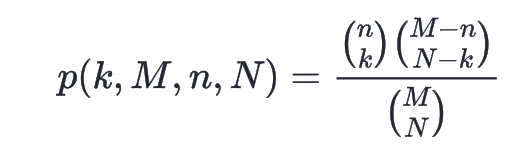


The book:

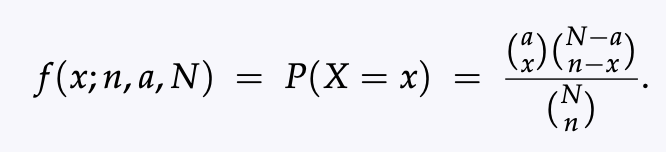

In [25]:
#hypergeometric distribution 
x = 0 #vi ønsker at se 0 sucesser
n = 3  #vi køber 3 aviser
N = 20 # antal aviser i alt
a = 6. #antal aviser med fejl

print(stats.hypergeom.pmf(x, N, a, n))

0.3192982456140351


In [9]:
#omvendt hvor vi siger at non discrepancy = sucess
x = 3 #vi ønsker at se 3 sucesser
n = 3  #vi køber 3 aviser
N = 20 # antal aviser i alt
a = 20-6. #antal aviser uden fejl

print(stats.hypergeom.pmf(x, N, a, n))

0.31929824561403514


### **Exercise 2.5 Hay delivery quality**

X follows the hypergeometric distribution:


In [21]:
N=20 #antal hay
a=2  #antal sucesser blandt N
n=3 #vi trækker to bales ud

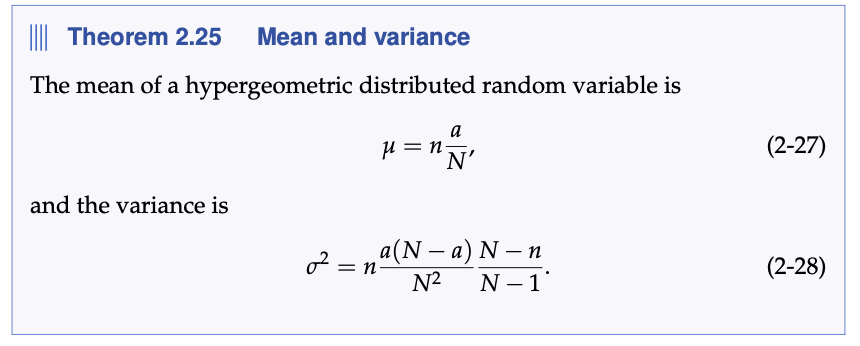

In [11]:
print("Mean:", n*a/N)
print("Variance:", n*a*(N-a)*(N-n)/(N**2)/(N-1))

Mean: 0.3
Variance: 0.24157894736842103


Or with stats:

In [12]:
mean, var = stats.hypergeom.stats(N, a, n, moments='mv')
print(mean)
print(var)

0.3
0.24157894736842106


In [22]:
stats.hypergeom.mean(N, a, n)

0.3

In [13]:
print("P(X>=1) = ", 1 - stats.hypergeom.pmf(0, N, a, n))

P(X>=1) =  0.28421052631578947


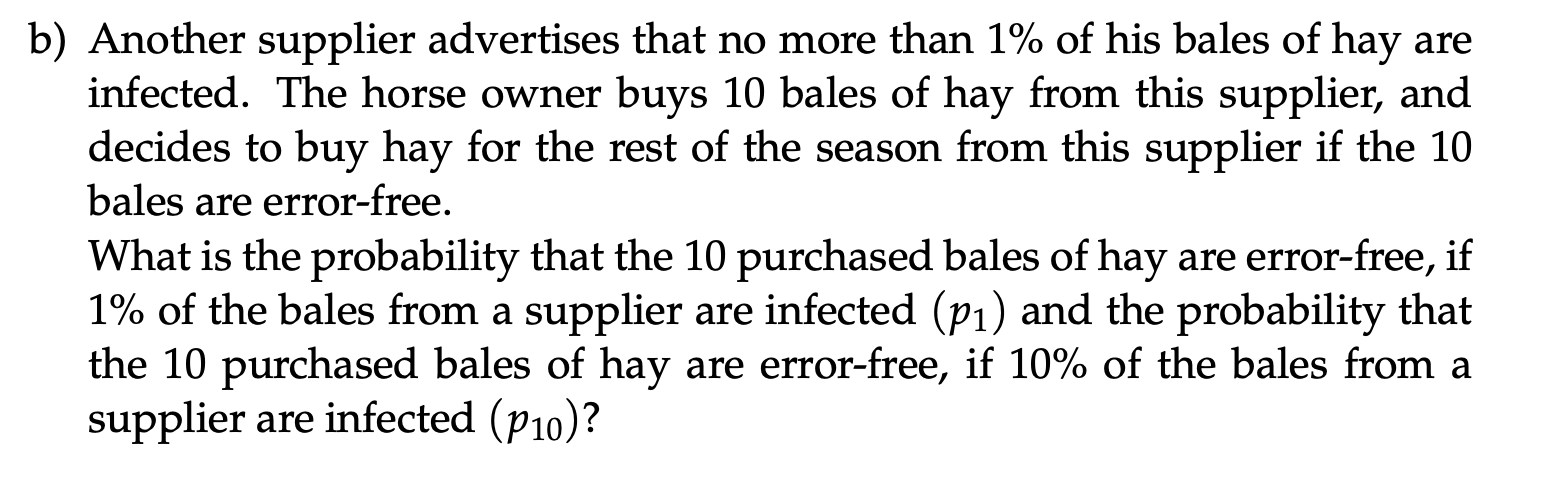

In [19]:
# Define the probabilities of infection
p1 = 0.01
p10 = 0.10

# Number of bales purchased
n = 10

# Probability that all 10 bales are error-free if 1% of the bales are infected
prob_error_free_p1 = stats.binom.pmf(10, n, 1 - p1)
print(f"Probability that all 10 bales are error-free if 1% of the bales are infected: {prob_error_free_p1:.4f}")

# Probability that all 10 bales are error-free if 10% of the bales are infected
prob_error_free_p10 = stats.binom.pmf(10, n, 1 - p10)
print(f"Probability that all 10 bales are error-free if 10% of the bales are infected: {prob_error_free_p10:.4f}")

Probability that all 10 bales are error-free if 1% of the bales are infected: 0.9044
Probability that all 10 bales are error-free if 10% of the bales are infected: 0.3487


### **Exercise 2.7 A fully automated production**

In [15]:
lambda_ = 1.6

# a) Probability that more than 5 items arrive in a given minute, P(X > 5)
prob_more_than_5 = 1 - stats.poisson.cdf(5, lambda_)
print(f"Probability that more than 5 items arrive in a given minute: {prob_more_than_5:.4f}")

# b) Probability that no more than 8 items arrive within a 5-minute period, P(X <= 8)
prob_no_more_than_8_in_5_minutes = stats.poisson.cdf(8, lambda_ * 5)
print(f"Probability that no more than 8 items arrive within a 5-minute period: {prob_no_more_than_8_in_5_minutes:.4f}")

Probability that more than 5 items arrive in a given minute: 0.0060
Probability that no more than 8 items arrive within a 5-minute period: 0.5925


### **Exercise 2.8 Call center staff**

In [16]:
# Define the rate of calls per minute
lambda_ = 180 / 60

# a) Probability that the capacity is exceeded in a random period of 5 minutes, P(X > 19)
prob_capacity_exceeded = 1 - stats.poisson.cdf(19, lambda_ * 5)
print(f"Probability that the capacity is exceeded in a random period of 5 minutes: {prob_capacity_exceeded:.4f}")

Probability that the capacity is exceeded in a random period of 5 minutes: 0.1248


PPF  = Probability Point Function

In [17]:
# b) Find the capacity such that the probability is at least 99% that all calls will be handled without waiting time
# P(X <= cap) >= 0.99
capacity = stats.poisson.ppf(0.99, lambda_ * 5)
print(f"The capacity must be at least {int(capacity)} calls per 5 minutes to ensure a 99% probability that all calls will be handled without waiting time.")

The capacity must be at least 25 calls per 5 minutes to ensure a 99% probability that all calls will be handled without waiting time.


In [18]:
print(stats.poisson.cdf(k=[22,23,24,25,26], mu=15))

[0.96725576 0.98053543 0.98883522 0.9938151  0.9966881 ]


## Exam Question


### Exercise I

A population is exponentially distributed with rate $\lambda = 2$. 

**Question I.1**

Which of the following statements is true?

1. The probability of obtaining an observation between 1 and 2 in a random draw can be calculated in Python by `expon.cdf(1, scale=1/2) - expon.cdf(2, scale=1/2)`
2. The probability of obtaining an observation below 1 in a random draw can be calculated in Python by `expon.cdf(2, scale=1/2)`
3. The probability of obtaining an observation below 1 in a random draw can be calculated in Python by `1 - expon.cdf(1, scale=1/2)`
4. The probability of obtaining an observation above 3 in a random draw can be calculated in Python by `expon.pdf(3, scale=1/2)`
5. **None of the above statements are correct.**

**Facit** <br>
The four answers are wrong:
1. It is the wrong order of subtraction, so a negative probability
2. It’s below 2
3. It’s the prbability when observation is above 1
4. It’s the probability density function at 3

**Question I.2**

According to the central limit theorem (CLT), what type of distribution approximates the mean of a random sample with $n = 100$ observations from the population?

1. The standard normal distribution
2. **A normal distribution (that is not also a standard normal distribution)**
3. An exponential distribution
4. A Poisson distribution
5. An F-distribution


**Facit** <br>

The **Central Limit Theorem (CLT)** states that the sampling distribution of the sample mean will approximate a **normal distribution**, regardless of the population's original distribution, as long as the sample size is sufficiently large. 

For a sample size of $ n = 100 $, the CLT implies:

1. The sample mean will approximately follow a **normal distribution**, even if the population distribution is not normal.
2. This approximation improves as $ n $ increases. For $ n = 100 $, which is relatively large, the approximation is expected to be very accurate.

*Key Points:*
- The CLT applies to the sampling distribution of the mean, not the individual data points.
- The population's distribution does not have to be normal for the sample mean to approximate a normal distribution.
- The sample size $ n = 100 $ is "large enough" for the CLT to hold well in most cases, making the normal approximation valid.

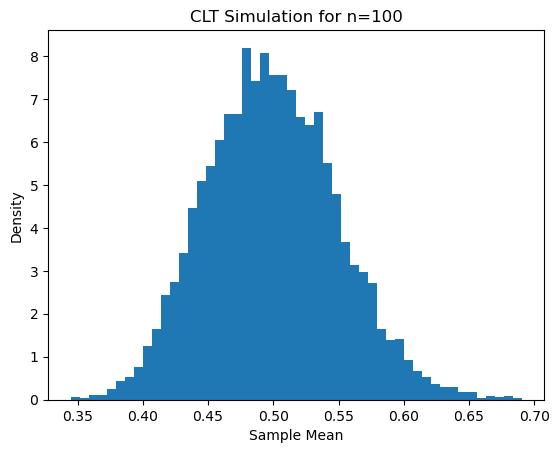

In [2]:
# For 5000 means, each calculated from 100 data from exponential distribution, the histogram shows normal distribution of the sample means. 
import numpy as np
import matplotlib.pyplot as plt

# Simulation for illustration
n = 100
means = [np.mean(np.random.exponential(1/2, n)) for _ in range(5000)]
plt.hist(means, bins=50, density=True)
plt.title("CLT Simulation for n=100")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()

### Question V.2 (14)

In a study of a supermarket, the arrival rate of customers is assumed to be 200 customers/hour in the peak hours. Customers arrive according to a Poisson process. If more than 250 customers arrive in an hour, the store’s capacity will be exceeded. 

**What is the probability that the store’s capacity is *not* exceeded during a peak hour?**

1 □ 0.00028  
2 □ 0.00061  
3 □ 0.51879  
4 □ 0.92470  
5* □ 0.99972  

In [3]:
import scipy.stats as stats
from scipy.stats import poisson

# Parameters
arrival_rate = 200  # average arrivals per hour
capacity = 250      # maximum capacity

# Calculate the probability that the number of arrivals is within the capacity (<= 250)
probability_within_capacity = poisson.cdf(capacity, arrival_rate)

# Display the result
print(f"The probability that the store's capacity is not exceeded during a peak hour is: {probability_within_capacity:.5f}")


The probability that the store's capacity is not exceeded during a peak hour is: 0.99972


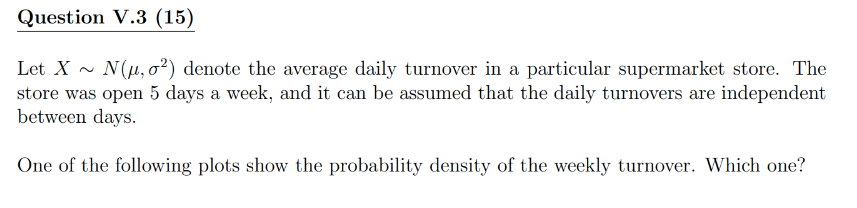

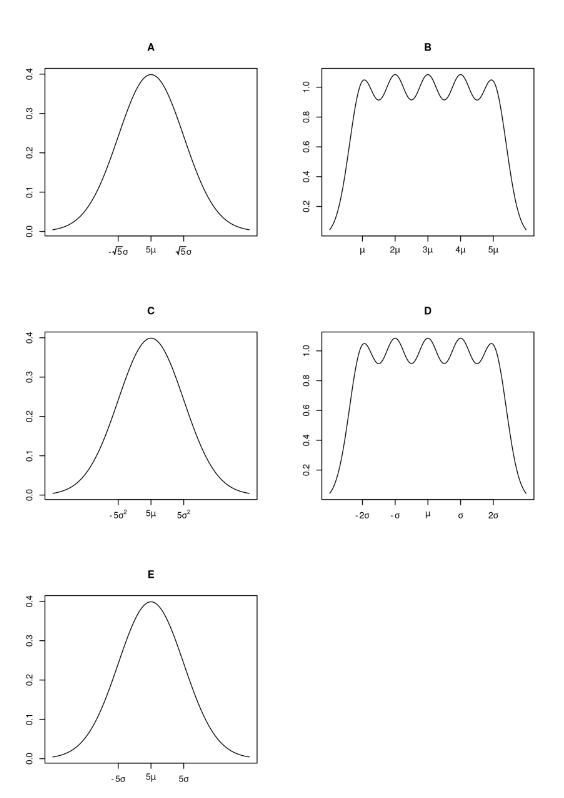

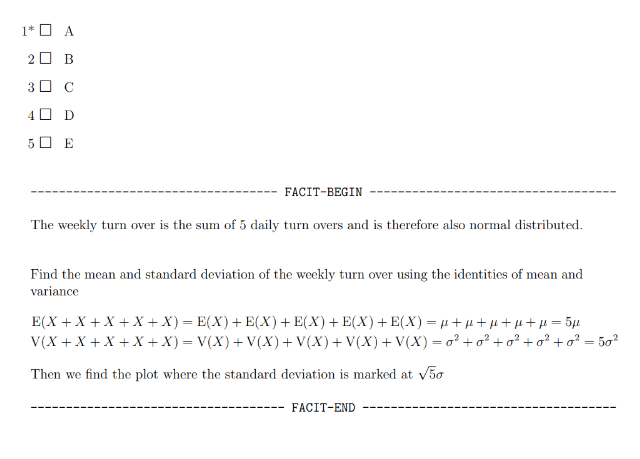

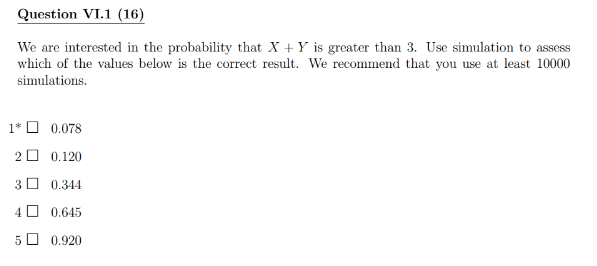

In [1]:
import numpy as np

# Parameters
rate_x = 1.2
rate_y = 1.7
n_samples = 1000000

# Generate random samples
x = np.random.exponential(scale=1/rate_x, size=n_samples)
y = np.random.exponential(scale=1/rate_y, size=n_samples)

# Calculate the proportion where x + y > 3
proportion = np.mean((x + y) > 3)

# Display the result
print(f"The proportion of x + y > 3 is: {proportion:.3f}")


The proportion of x + y > 3 is: 0.078


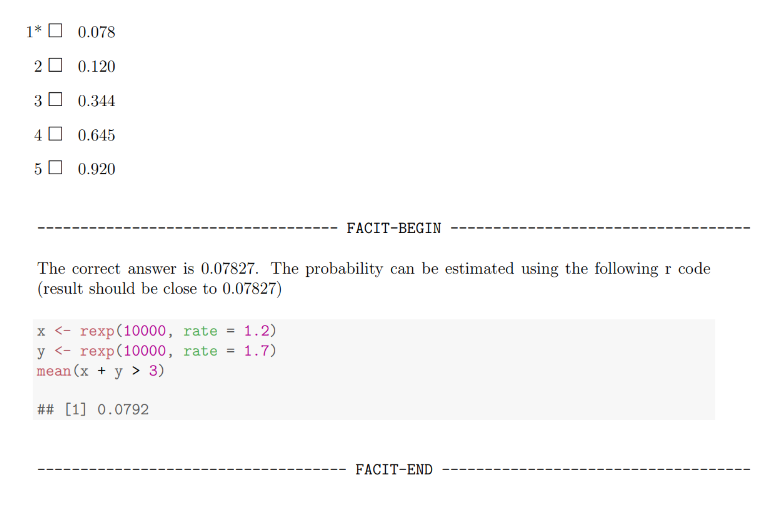